# Suboptimility vs. $\epsilon$

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


parameters = {'axes.labelsize': 20,
             'axes.titlesize': 27,
             'legend.fontsize': 20}
plt.rcParams.update(parameters)

Definition of suboptimality function:

$$ Sub(\epsilon) = W_{2, \epsilon}^2(\rho, \mu) - W_{2}^2(\rho, \mu) = 8 \int_0^\infty \frac{x}{1 + e^{4x/\epsilon}} \rho(x) dx = 8 \int_0^\infty \frac{x e^{-4x/\epsilon}}{1 + e^{-4x/\epsilon}} \rho(x) dx.$$

In [2]:
def suboptimality(eps, rho, M):
    f = lambda x: 8 * x * np.exp(-4*x/eps)/(1 + np.exp(-4*x/eps)) * rho(x) 
    return quad(f, 0, M, epsabs=1e-20, epsrel=1e-20, limit=200)[0] 

Definition of asymptotic:
$$ Asymp(\epsilon) = \frac{\pi^2 \rho(0)}{24} \epsilon^2. $$

In [3]:
def asymp(eps, rho):
    return np.pi**2 * rho(0) * eps**2 / 24

## Lebesgue

Definition of source:
$$\rho(x) = \frac{1}{Z} \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0


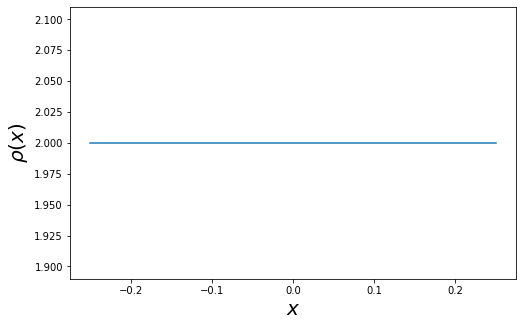

In [4]:
M = 0.25

f = lambda u: np.ones_like(u)
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

plt.rcParams["figure.figsize"] = (8, 5)
xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.show()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


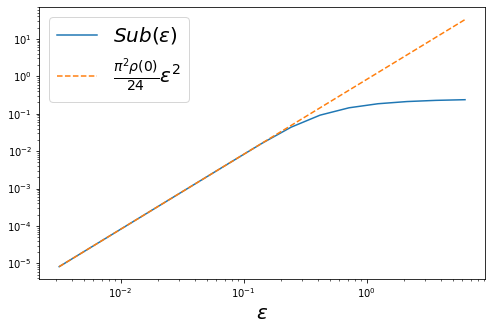

In [5]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.show()

In [6]:
comparison = np.array([eps**(3) for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$C \epsilon^{3}$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.title("Lebesgue")
plt.legend()
plt.savefig('outputs/cv-rate-to-asymptotic-lebesgue.pdf', bbox_inches='tight')
plt.show()

## Rescaled Gaussian

Definition of source:
$$\rho(x) = \frac{1}{Z}e^{-x^2/\sigma^2} \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0000000000000002


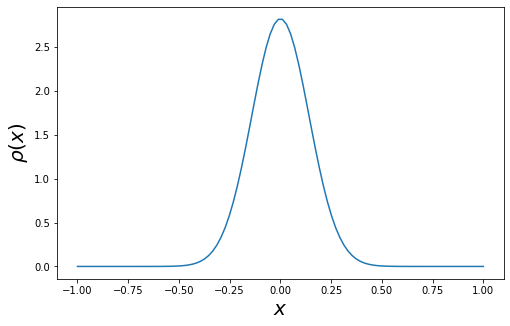

In [7]:
sigma = 0.2
M = 1

f = lambda u: np.exp(-u**2/sigma**2)
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10, limit=200)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


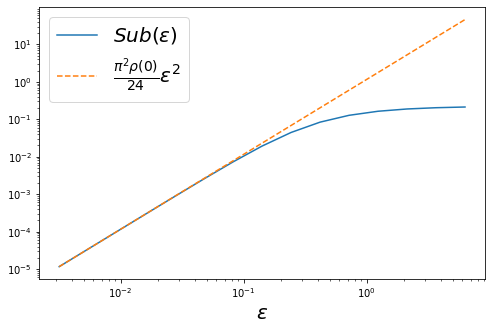

In [8]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.show()

Plot of (asymptotic - suboptimality):

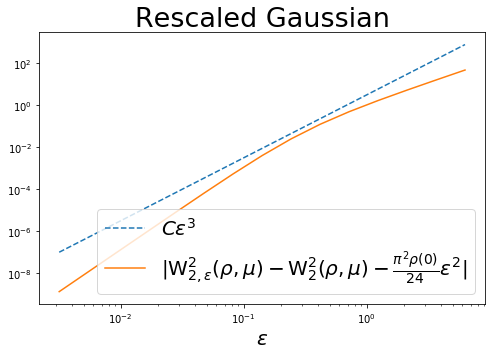

In [9]:
comparison = np.array([eps**3 for eps in epsilons])
plt.loglog(epsilons, 3e0*comparison, "--", label=r"$C \epsilon^3$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.title("Rescaled Gaussian")
plt.legend()
plt.savefig('outputs/cv-rate-to-asymptotic-gaussian.pdf', bbox_inches='tight')
plt.show()

## Rescaled Laplace

Definition of source $\rho$:
$$\rho(x) = \frac{1}{Z}e^{-|x|} \mathbb{1}_{[-M, M]}(x) $$

Integral over [-M, M]: 0.9999999999999998


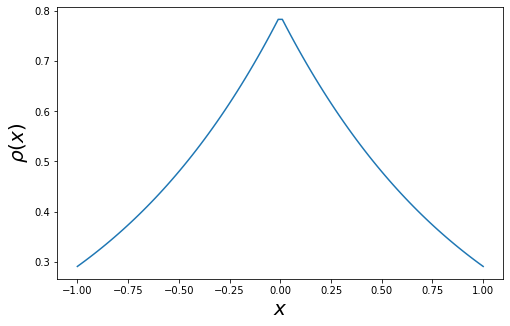

In [10]:
M = 1

f = lambda u: np.exp(-np.abs(u))
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


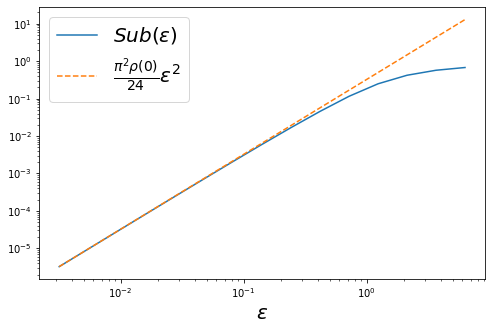

In [11]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.show()

Plot of (asymptotic - suboptimality):

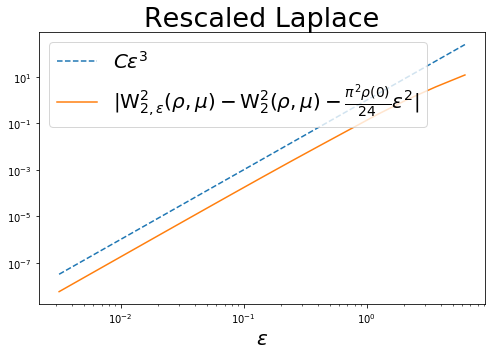

In [12]:
comparison = np.array([eps**3 for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$C \epsilon^3$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.title("Rescaled Laplace")
plt.legend()
plt.savefig('outputs/cv-rate-to-asymptotic-laplace.pdf', bbox_inches='tight')
plt.show()

## $\frac{1}{2}$-Hölder

Definition of source:
$$\rho(x) = \frac{1}{Z}(1 - |x|^{1/2}) \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0


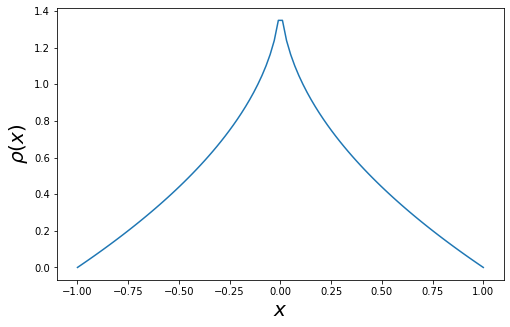

In [13]:
sigma = 2
M = 1

f = lambda u: 1 - np.sqrt(np.abs(u))
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.show()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


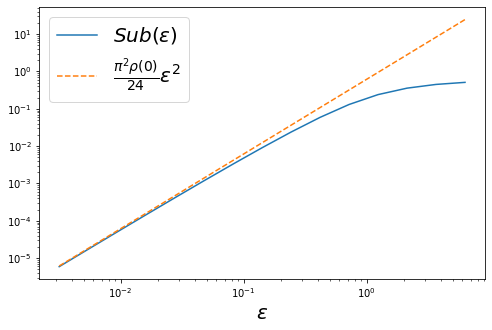

In [14]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.show()

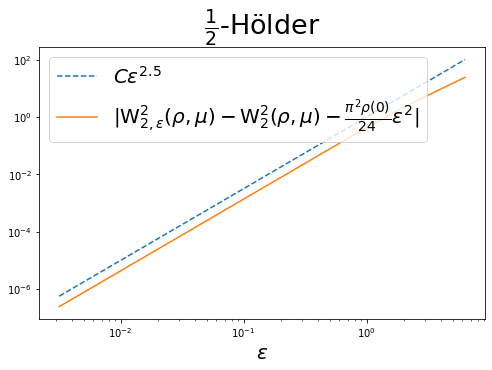

In [15]:
comparison = np.array([eps**(2.5) for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$C \epsilon^{2.5}$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.title(r"$\frac{1}{2}$-Hölder")
plt.legend()
plt.savefig('outputs/cv-rate-to-asymptotic-sqrt.pdf', bbox_inches='tight')  
plt.show()